## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset and Clean Data

In [2]:
df = pd.read_csv("Volumetric_features.csv")
df.dropna(inplace=True)
df.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [3]:
X = df.drop(['Age'], axis=1).values
Y = df['Age'].values
X_norm = MinMaxScaler().fit_transform(X)

## Generate Train-Test Split (30% Test/70% Train)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Testing

In [5]:
#Using DecisionTreeRegressor as Base
base_estimator = DecisionTreeRegressor()

bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=10, random_state=42)
bagging_model.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

In [6]:
Y_pred = bagging_model.predict(X_test)

In [7]:
mse = mean_squared_error(Y_test, Y_pred)

r2 = r2_score(Y_test, Y_pred)
norm_rmse = np.sqrt(mse)/(max(Y_test)-min(Y_test))

print('Normalized rmse:', norm_rmse)
print('R-squared score:', r2)


Normalized rmse: 0.09659656752750893
R-squared score: 0.865308617861669


Text(0.5, 1.0, 'Actual vs Predicted')

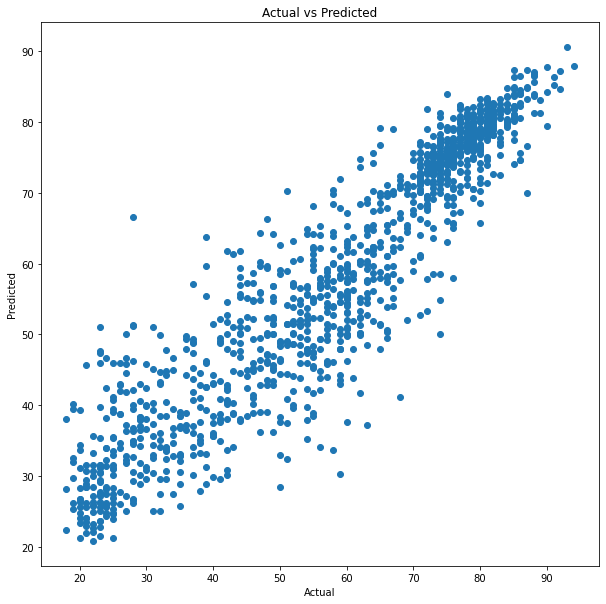

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')